Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Paul de Graaf"
COLLABORATORS = "Luc de Vries"

---

# Python assignment

The python assignment you can do either on your own or with one other student (i.e. max group size is 2 students).

The first cell of your notebook, should contain a table with the names and SNRs and ANRs of the group members, like so

|Name|SNR|ANR|
|----|---|----|
|Paul de Graaf|2026405|u663408|
|adam smith|56789|u1234|



See [the webpage](https://janboone.github.io/applied-economics/#org065a005) for details of what we expect to see in this assignment.



# Research question (0.5 points)

What is best method to achieve the goals of the Common agricultural policy?

# Motivation (0.5 points)

Motivate why this question is interesting.

the common agricultural policy is the policy of the EU regarding agriculture. This policy has been heavily debated inside and outside the european union.  The importance of the subject is shown by the huge amount of money that is used to support EU Farmers. The EU has spended 57.9 billion euros while the total EU budget is 103.08 billion euros and the CAP has been changing over time. On 2 December 2021 there has been agreed upon a new CAP which will be practically implemented on the first of january 2023. (https://ec.europa.eu/info/food-farming-fisheries/key-policies/common-agricultural-policy/cap-glance_en) So, it is important to understand the effects of certain policies to make the right decisions over time. Besides, in the Netherlands most farmers are tired of the rule changes which restricts them from making a fair income, because they have to invest to follow to regulations. Resulting in a decrease of farmers. Therefore, we should know what the best policy and use it consistently.(https://www.rtvoost.nl/nieuws/2040308/Boeren-over-regeerakkoord-Lat-stikstofvermindering-te-hoog-blij-dat-halvering-veestapel-van-tafel-is)

# Method (0.5 points)


The Goals of the CAP are to support farmers and improve agricultural productivity, ensuring a stable supply of affordable food; safeguard European Union farmers to make a reasonable living; help tackle climate change and the sustainable management of natural resources;maintain rural areas and landscapes across the EU;keep the rural economy alive by promoting jobs in farming, agri-food industries and associated sectors(https://ec.europa.eu/info/food-farming-fisheries/key-policies/common-agricultural-policy/cap-glance_en). As it is difficult to measure the effect of the different policies on climate change and maintaince of rural areas. We will focus on the stable supply, reasonable living and promoting jobs. We will measure it in the models as a supply and price/producer surplus. As a high supply naturally ensures supply and a high price/producer surplus ensures a reasonable living for the farmers. The EU can use three different types of interventions. First, it can pay a direct amount to the farmers to ensure a fair pay. Secondly, the EU can set a minimum price. Thirdly, it can buy goods in the market and sell it at a later time, to increase the price. However, in this model we will sell it immediately to the world market. We think it is a fair assumption as some goods such as milk can't be stored for long and have to be consumed in a short period of time. We will try to find out the results of the three intervention on the two goals, making use of a simulated normally distributed demand and supply line. We will check in the sensitivity analysis if the use of linear demand and supply lines change our results as well as a change in the vastness of the intervention. 

# [optional] Data [0.5 points]

**These 0.5 points are instead of the Method points above**

If you use data for your assignment, the Method part above does not apply. Instead,

* explain where your data come from (give a link or the code to download the data if you use an API like [wbdata](https://wbdata.readthedocs.io/en/stable/));
* explain the data cleaning and data normalization steps that you use;
* make sure that the data is in your github repository as well (or explain why this is not possible) so that we can replicate your analysis;
* what statistical methods do you use with the data.


YOUR ANSWER HERE

# Preview of the answers (0.5 points)

Summarize the results that you find and the answer to your research question.

The use of direct payments to the farmer will increase the producer surplus, however it does not grow with the same amount of the direct payment due to the price decrease. Moreover, the supply increased due to the increased supply. 
The use of a minimun price increased the PS due to a higher price, however there a fewer goods supplied. The reason is that there a not enough buyers for all supply at the higher price. 
Buying goods until the price rose to a certain level increases supply and increased price/producer surplus.

# Main assumptions (0.5 points)

What are the main assumptions that you need to answer the question? If you do a theory notebook, what are the main assumptions of your model? If you use data, what assumptions are needed by your estimation method.

An assumption is that there is no import of goods from outside the European Union due to for exemple import tariffs. We understand this is a big assumption as there is a possibility to sell the bought good in the EU at the world market. Besides, we assume that the good are immediately sold at the world market price. This is fair for some products, but not for all. 

# Python code (6.5 points)


Give the python code in code cells and use markdown cells to explain why you code things in this way and what the outcomes are of the code cells.

Note that the explanation of your code is at least as important as the python code itself.

Create as many python and markdown cells as you need to explain things well.


In [130]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import matplotlib.patches as pl
import seaborn as sns
from scipy import stats, optimize
import random
import wbdata as wb

plt.style.use('seaborn')
%matplotlib inline

In [131]:
#first we start with a simple model of a supply and demand curve.
number_of_agents = 1000
number_of_goods = 100

valuations = np.array(sorted(pm.Normal.dist(0.35,0.1).random(size=number_of_agents),reverse = True))

valuations_s = np.array(sorted(pm.Normal.dist(0.35,0.1).random(size=number_of_agents),reverse = False))

def demand(p,valuations) : 
    return np.sum(valuations>p)

def supply(p,valuations_s) : 
    return np.sum(valuations_s<p)

In [132]:
#solve for Q and P
def demand_minus_supply(p,valuations,valuations_s) : 
    return demand(p,valuations)-supply(p,valuations_s)

price = optimize.fsolve(lambda p: demand_minus_supply(p,valuations,valuations_s),0.5)
print(price)
Q = demand(price,valuations)
print(Q)

[0.34761933]
506


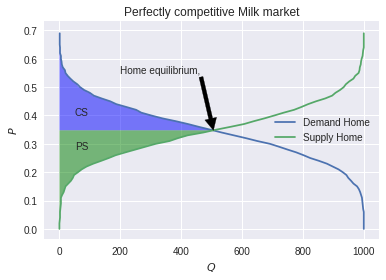

In [133]:
#plot formulas and surplusses
range_p = np.arange(0.0,0.7,0.01)
range_d = np.arange(0.0,Q,1)
plt.plot([demand(p,valuations) for p in range_p], range_p,label="Demand Home")
plt.plot([supply(p,valuations_s)for p in range_p],range_p,label="Supply Home")
plt.fill_between(range_d,valuations[0:Q],price,facecolor='b',alpha=0.5,interpolate=True)
plt.fill_between(range_d,valuations_s[0:Q],price,facecolor='g',alpha=0.5,interpolate=True)
plt.legend(loc=5)
plt.xlabel('$Q$')
plt.ylabel('$P$')
plt.title('Perfectly competitive Milk market')
plt.annotate('Home equilibrium,', xy=(Q, price), xytext=(200, 0.55),arrowprops=dict(facecolor='black', shrink=1.5))
plt.annotate(("CS"),xy=(50,0.4))
plt.annotate(("PS"),xy=(50,0.28))
plt.show()

In [134]:
#calculate surplus
CS= np.sum(valuations[valuations> price]-price )
PS = np.sum(price -valuations_s[valuations_s<price])
TS=CS+PS
print([CS,PS,TS])

[41.06300659036238, 39.03818258897972, 80.1011891793421]


In [135]:
#Direct payment to farmers
#we assume that a payment to farmers increases supply, So the supply at a lower price
valuations_dp = valuations_s-0.1
print(valuations_s.mean())
print(valuations_dp.mean())

def supplydp(p,valuations_dp) : 
    return np.sum(valuations_dp<p)

0.3478089990626968
0.2478089990626968


In [136]:
#solve for Q and P with and without direct payment
#without direct payment
print(price)
print(Q)
#with direct payment
def demand_minus_supplydp(p,valuations,valuations_dp) : 
    return demand(p,valuations)-supplydp(p,valuations_dp)

pricedp = optimize.fsolve(lambda p: demand_minus_supply(p,valuations,valuations_dp),0.5)
print(pricedp)
Qdp = demand(pricedp,valuations)
print(Qdp)

[0.34761933]
506
[0.29753669]
697


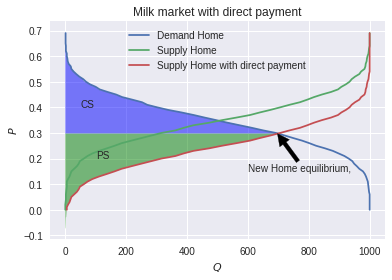

In [191]:
#plot formulas and surplusses
range_p = np.arange(0.00,0.7,0.01)
range_d = np.arange(0.0,Qdp,1)
plt.plot([demand(p,valuations) for p in range_p], range_p,label="Demand Home")
plt.plot([supply(p,valuations_s)for p in range_p],range_p,label="Supply Home")
plt.plot([supplydp(p,valuations_dp)for p in range_p],range_p,label="Supply Home with direct payment")
plt.fill_between(range_d,valuations[0:Qdp],pricedp,facecolor='b',alpha=0.5,interpolate=True)
plt.fill_between(range_d,valuations_dp[0:Qdp],pricedp,facecolor='g',alpha=0.5,interpolate=True)
plt.legend(loc=9)
plt.xlabel('$Q$')
plt.ylabel('$P$')
plt.title('Milk market with direct payment')
plt.annotate('New Home equilibrium,', xy=(Qdp, pricedp), xytext=(600, 0.15),arrowprops=dict(facecolor='black', shrink=1.5))
plt.annotate(("CS"),xy=(50,0.4))
plt.annotate(("PS"),xy=(100,0.2))
plt.show()

In [138]:
#calculate surplus

#calculate surplus without direct payment
CS= np.sum(valuations[valuations> price]-price )
PS = np.sum(price -valuations_s[valuations_s<price])
TS=CS+PS
print([CS,PS,TS])


#calculate surplus with direct payment
CSdp= np.sum(valuations[valuations> pricedp]-pricedp )
PSdp = np.sum(pricedp -valuations_dp[valuations_dp<price])
# calculate the amount of payment to farmers
DP = 0.1*Qdp
TSdp=CSdp+PSdp-DP
print([CSdp,PSdp,DP,TSdp])

[41.06300659036238, 39.03818258897972, 80.1011891793421]
[71.26157280793547, 66.24213083355703, 69.7, 67.8037036414925]


Conclusion direct payment; 
We find that a giving a direct payment to farmers will increase the amount of supply, So more home supply and less dependency. Therefore, one objective of the CAP is achieved. However, the price of the product decreased. So, farmers get a lower price than without the direct payment. This is where we loss Surplus, due to the lower price the PS does not increase with the same amount as the direct payments. Although the CS is higher than without the direct payments the Total surplus is lower than before. 

In [140]:
#we add a price floor at 0.4
Min_price=0.4
Q_demandf = demand(Min_price,valuations)

Q_supplyf = supply(Min_price,valuations_s)

print([Q_demandf,Q_supplyf])
print(Q)
print(price)

[302, 706]
506
[0.34761933]


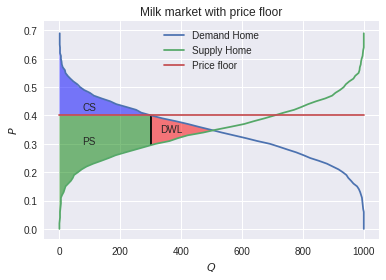

In [141]:
range_d = np.arange(0.0,Q_demandf,1)
range_f = np.arange(Q_demandf,Q,1)
Sup_Q = valuations_s[Q_demandf]
plt.plot([demand(p,valuations) for p in range_p], range_p,label="Demand Home")
plt.plot([supply(p,valuations_s)for p in range_p],range_p,label="Supply Home")
plt.plot([0,1000],[Min_price,Min_price],label="Price floor")
plt.vlines(x = Q_demandf, ymin=Sup_Q, ymax = Min_price, color = "Black",linestyle = "-")
plt.fill_between(range_d,valuations[0:Q_demandf],Min_price,facecolor='b',alpha=0.5,interpolate=True)
plt.fill_between(range_d,valuations_s[0:Q_demandf],Min_price,facecolor='g',alpha=0.5,interpolate=True)
plt.fill_between(range_f,valuations[range_f],valuations_s[range_f],facecolor = 'r',alpha=0.5,interpolate=True)
plt.legend(loc=9)
plt.xlabel('$Q$')
plt.ylabel('$P$')
plt.title('Milk market with price floor')
plt.annotate(("CS"),xy=(75,0.42))
plt.annotate(("PS"),xy=(75,0.3))
plt.annotate(("DWL"),xy=(330,0.34))
plt.show()

In [142]:
#Surplus calculation
CSf= np.sum(valuations[valuations> Min_price]-Min_price )
PSf = np.sum(Min_price -valuations_s[0:Q_demandf])
DWLf= np.sum(valuations[Q_demandf:Q]-valuations_s[Q_demandf:Q])
TSf= CSf+PSf-DWLf
print([CS,PS,TS])
print([CSf,PSf,DWLf,TSf])

[41.06300659036238, 39.03818258897972, 80.1011891793421]
[19.882220599251088, 49.82932675641135, 10.389641823679657, 59.32190553198278]


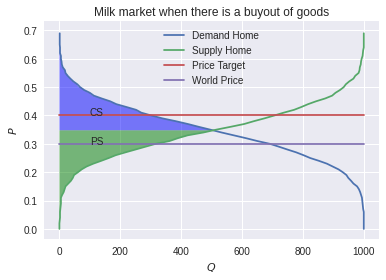

In [155]:
##Buyout of goods to increase price. 
pricetarget=0.4
worldprice=0.3
range_p = np.arange(0.0,0.7,0.01)
range_d = np.arange(0.0,Q,1)
plt.plot([demand(p,valuations) for p in range_p], range_p,label="Demand Home")
plt.plot([supply(p,valuations_s)for p in range_p],range_p,label="Supply Home")
plt.plot([0,1000],[pricetarget,pricetarget],label="Price Target")
plt.plot([0,1000],[worldprice,worldprice],label="World Price")
plt.fill_between(range_d,valuations[0:Q],price,facecolor='b',alpha=0.5,interpolate=True)
plt.fill_between(range_d,valuations_s[0:Q],price,facecolor='g',alpha=0.5,interpolate=True)
plt.legend(loc=9)
plt.xlabel('$Q$')
plt.ylabel('$P$')
plt.title('Milk market when there is a buyout of goods')
plt.annotate(("CS"),xy=(100,0.4))
plt.annotate(("PS"),xy=(100,0.3))
plt.show()

In [156]:
Q_demandm = demand(pricetarget,valuations)

Q_supplym = supply(pricetarget,valuations_s)

print([Q_demandm,Q_supplym])
print(Q)
print(price)

[302, 706]
506
[0.34761933]


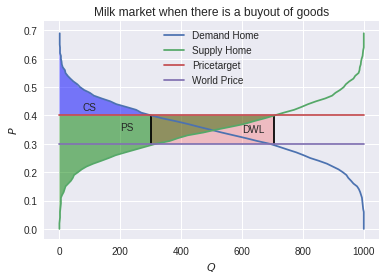

In [145]:
# the EU thinks that the price is too low and wants to increase the price to 0.4 to ensure that the farmers has a fair income. 
# the EU can do this by bying the amount of difference between the home demand and home supply assuming that the tariffs on world good is high enoungh to make it not cheaper than 0.4 for consumers.
# this will costs the difference between the targetprice and the worldprice, because they will sell it at a world market price.
range_d = np.arange(0.0,Q_demandf,1)
range_m = np.arange(0.0,Q_supplym,1)
range_f = np.arange(Q_demandm,Q_supplym,1)
Sup_Q = valuations_s[Q_demandm]
plt.plot([demand(p,valuations) for p in range_p], range_p,label="Demand Home")
plt.plot([supply(p,valuations_s)for p in range_p],range_p,label="Supply Home")
plt.plot([0,1000],[Min_price,Min_price],label="Pricetarget")
plt.plot([0,1000],[worldprice,worldprice],label="World Price")
plt.vlines(x = Q_demandm, ymin=Sup_Q, ymax = pricetarget, color = "Black",linestyle = "-")
plt.vlines(x = Q_supplym, ymin=Sup_Q, ymax = pricetarget, color = "Black",linestyle = "-")
plt.fill_between(range_d,valuations[0:Q_demandm],pricetarget,facecolor='b',alpha=0.5,interpolate=True)
plt.fill_between(range_m,valuations_s[0:Q_supplym],pricetarget,facecolor='g',alpha=0.5,interpolate=True)
plt.fill_between(range_f,worldprice,pricetarget,facecolor = 'r',alpha=0.2,interpolate=True)
plt.legend(loc=9)
plt.xlabel('$Q$')
plt.ylabel('$P$')
plt.title('Milk market when there is a buyout of goods')
plt.annotate(("CS"),xy=(75,0.42))
plt.annotate(("PS"),xy=(200,0.35))
plt.annotate(("DWL"),xy=(600,0.34))
plt.show()


In [158]:
#Surplus calculation
CSm= np.sum(valuations[valuations> pricetarget]-pricetarget )
PSm = np.sum(pricetarget -valuations_s[0:Q_supplym])
DWLm= (Q_supplym-Q_demandm)*(pricetarget-worldprice)
TSm= CSm+PSm-DWLm
print([CS,PS,TS])
print([CSm,PSm,DWLm,TSm])

[41.06300659036238, 39.03818258897972, 80.1011891793421]
[19.882220599251088, 71.18404512269834, 40.40000000000001, 50.66626572194941]


The buyout offers the two main goals of the CAP to be achieved, namely the farmers earn a higher wage and there will more home suppliers than before. Making it less dependent on the rest of the world

# Sensitivity analysis (0.5 points)

If you do a theory notebook, program different values for the parameters, use different functional forms and solve your model again for these new values. Show that the outcomes are robust to such changes.

If you are using data, how sensitive are your results to outliers in the data, different choices when cleaning the data, different functional forms for the relations that you estimate.


we will shift the direct payment, minimumprice, pricetarget as well as the worldprice to see if this chances our results. 

In [103]:
#a lower direct payment of 0.05
valuations_n = valuations_s-0.05

def supplyn(p,valuations_n) : 
    return np.sum(valuations_n<p)
print(price,Q)
#with direct payment
def demand_minus_supplyn(p,valuations,valuations_n) : 
    return demand(p,valuations)-supplydp(p,valuations_n)

pricen = optimize.fsolve(lambda p: demand_minus_supplyn(p,valuations,valuations_n),0.5)
print(pricen)
Qn = demand(pricen,valuations)
print(Qn)

#calculate surplus with direct payment 0.5 instead of 1
CSn= np.sum(valuations[valuations> pricen]-pricen )
PSn = np.sum(pricen -valuations_n[valuations_n<pricen])
# calculate the amount of payment to farmers
DP = 0.05*Qn
TSn=CSn+PSn-DP
print([CS,PS,TS])
print([CSn,PSn,DP,TSn])

0.3506784505711256
0.30067845057112563
[0.35265455]
513
[0.32387275]
613
[40.2865538789283, 40.55015553092739, 80.8367094098557]
[56.60137037218982, 52.544122731732, 30.650000000000002, 78.49549310392182]


In [107]:
# a higher direct payment of 0.15
valuations_n = valuations_s-0.15

def supplyn(p,valuations_n) : 
    return np.sum(valuations_n<p)
print(price,Q)

#with direct payment
def demand_minus_supplyn(p,valuations,valuations_n) : 
    return demand(p,valuations)-supplydp(p,valuations_n)

pricen = optimize.fsolve(lambda p: demand_minus_supplyn(p,valuations,valuations_n),0.5)
Qn = demand(pricen,valuations)
print(pricen, Qn)

#calculate surplus with direct payment 0.5 instead of 1
CSn= np.sum(valuations[valuations> pricen]-pricen )
PSn = np.sum(pricen -valuations_n[valuations_n<pricen])
# calculate the amount of payment to farmers
DP = 0.15*Qn
TSn=CSn+PSn-DP
print([CS,PS,TS])
print([CSn,PSn,DP,TSn])

[0.35265455] 513
[0.27493875] 781
[40.2865538789283, 40.55015553092739, 80.8367094098557]
[90.73364480499174, 88.42604766674874, 117.14999999999999, 62.00969247174048]


In [115]:
# a lowering of the minimum price to 0.38
Min_price=0.38
Q_demandf = demand(Min_price,valuations)

Q_supplyf = supply(Min_price,valuations_s)

print([Q_demandf,Q_supplyf])
print(price, Q)

CSf= np.sum(valuations[valuations> Min_price]-Min_price )
PSf = np.sum(Min_price -valuations_s[0:Q_demandf])
DWLf= np.sum(valuations[Q_demandf:Q]-valuations_s[Q_demandf:Q])
TSf= CSf+PSf-DWLf
print([CS,PS,TS])
print([CSf,PSf,DWLf,TSf])

[387, 634]
[0.35265455] 513
[40.2865538789283, 40.55015553092739, 80.8367094098557]
[28.0725448641805, 49.24399437404397, 3.520170171631219, 73.79636906659324]


In [117]:
# a increament of the minimum price to 0.42
Min_price=0.42
Q_demandf = demand(Min_price,valuations)

Q_supplyf = supply(Min_price,valuations_s)

print([Q_demandf,Q_supplyf])
print(price, Q)

CSf= np.sum(valuations[valuations> Min_price]-Min_price )
PSf = np.sum(Min_price -valuations_s[0:Q_demandf])
DWLf= np.sum(valuations[Q_demandf:Q]-valuations_s[Q_demandf:Q])
TSf= CSf+PSf-DWLf
print([CS,PS,TS])
print([CSf,PSf,DWLf,TSf])

[245, 766]
[0.35265455] 513
[40.2865538789283, 40.55015553092739, 80.8367094098557]
[15.445813724103017, 48.74596629830221, 16.644929387450464, 47.546850634954765]


In [160]:
pricetarget=0.42
worldprice=0.3
Q_demandm = demand(pricetarget,valuations)

Q_supplym = supply(pricetarget,valuations_s)

print([Q_demandm,Q_supplym])
print(price,Q)
#Surplus calculation
CSm= np.sum(valuations[valuations> pricetarget]-pricetarget )
PSm = np.sum(pricetarget -valuations_s[0:Q_supplym])
DWLm= (Q_supplym-Q_demandm)*(pricetarget-worldprice)
TSm= CSm+PSm-DWLm
print([CS,PS,TS])
print([CSm,PSm,DWLm,TSm])


[252, 771]
[0.34761933] 506
[41.06300659036238, 39.03818258897972, 80.1011891793421]
[14.416731569832898, 85.92742278771097, 62.28, 38.064154357543856]


In [161]:
pricetarget=0.38
worldprice=0.3
Q_demandm = demand(pricetarget,valuations)

Q_supplym = supply(pricetarget,valuations_s)

print([Q_demandm,Q_supplym])
print(price,Q)
#Surplus calculation
CSm= np.sum(valuations[valuations> pricetarget]-pricetarget )
PSm = np.sum(pricetarget -valuations_s[0:Q_supplym])
DWLm= np.sum(valuations_s[Q_demandm:Q_supplym]-worldprice)
TSm= CSm+PSm-DWLm
print([CS,PS,TS])
print([CSm,PSm,DWLm,TSm])

[382, 639]
[0.34761933] 506
[41.06300659036238, 39.03818258897972, 80.1011891793421]
[26.658537325557965, 57.74940272832987, 12.489902609158035, 71.9180374447298]


In [162]:
pricetarget=0.4
worldprice=0.28
Q_demandm = demand(pricetarget,valuations)

Q_supplym = supply(pricetarget,valuations_s)

print([Q_demandm,Q_supplym])
print(price,Q)
#Surplus calculation
CSm= np.sum(valuations[valuations> pricetarget]-pricetarget )
PSm = np.sum(pricetarget -valuations_s[0:Q_supplym])
DWLm= np.sum(valuations_s[Q_demandm:Q_supplym]-worldprice)
TSm= CSm+PSm-DWLm
print([CS,PS,TS])
print([CSm,PSm,DWLm,TSm])

[302, 706]
[0.34761933] 506
[41.06300659036238, 39.03818258897972, 80.1011891793421]
[19.882220599251088, 71.18404512269834, 27.12528163371301, 63.94098408823641]


In [163]:
pricetarget=0.4
worldprice=0.32
Q_demandm = demand(pricetarget,valuations)

Q_supplym = supply(pricetarget,valuations_s)

print([Q_demandm,Q_supplym])
print(price,Q)
#Surplus calculation
CSm= np.sum(valuations[valuations> pricetarget]-pricetarget )
PSm = np.sum(pricetarget -valuations_s[0:Q_supplym])
DWLm= np.sum(valuations_s[Q_demandm:Q_supplym]-worldprice)
TSm= CSm+PSm-DWLm
print([CS,PS,TS])
print([CSm,PSm,DWLm,TSm])

[302, 706]
[0.34761933] 506
[41.06300659036238, 39.03818258897972, 80.1011891793421]
[19.882220599251088, 71.18404512269834, 10.965281633713015, 80.1009840882364]


In [167]:
#linear demand and supply curves
def demandl(p) : 
    return 1000-(1/0.0007)*p

def supplyl(p) : 
    return (1000/0.7)*p

def demand_minus_supplyl(p) : 
    return demandl(p)-supplyl(p)

pricel = optimize.fsolve(lambda p: demand_minus_supplyl(p),0.5)
print(pricel)
Ql = demandl(pricel)
print(Ql)

[0.35]
[500.]


In [169]:
#Surplus calculation
CSl= (0.7-pricel)*Ql*0.5
PSl = pricel*Ql*0.5
TSl= CSl+PSl
print(CSl,PSl,TSl)

[87.5] [87.5] [175.]


In [179]:
#direct payment of 0.1
direct_payment=0.1
def supplyln(p) : 
    return (1000/0.7)*p+(direct_payment*1000)/0.7
print(pricel,Ql)
#with direct payment
def demand_minus_supplyln(p) : 
    return demandl(p)-supplyln(p)

priceln = optimize.fsolve(lambda p: demand_minus_supplyln(p),0.5)
print(priceln)
Qln = demandl(priceln)
print(Qln)

print(CSl,PSl,TSl)
# calculate the amount of payment to farmers
CSln= (0.7-priceln)*Qln*0.5
PSln = priceln*Qln*0.5
DPln = 0.1*Qln
TSln= CSln+PSln-DPln
print(CSln,PSln,DPln,TSln)

[0.35] [500.]
[0.3]
[571.42857143]
[87.5] [87.5] [175.]
[114.28571429] [85.71428571] [57.14285714] [142.85714286]


In [183]:
# minimum price
Min_price=0.4
Q_demandlf = demandl(Min_price)
Q_supplylf = supplyl(Min_price)
#p of supply curve at Q_demandlf
p_supply=0.7/1000*Q_demandlf
print([Q_demandf,Q_supplyf])
print(pricel, Ql)

CSlf= (0.7-Min_price)*Q_demandlf*0.5
PSlf = p_supply*Q_demandlf*0.5+Q_demandlf*(Min_price-p_supply)
TSlf= CSlf+PSlf
print(CSl,PSl,TSl)
print(CSlf,PSlf,TSlf)

[302, 706]
[0.35] [500.]
[87.5] [87.5] [175.]
64.28571428571426 107.14285714285714 171.4285714285714


In [189]:
pricetarget=0.40
worldprice=0.3
Q_demandlm = demandl(pricetarget)
Q_supplylm = supplyl(pricetarget)
print([Q_demandlm,Q_supplylm])
print(pricel,Ql)
#Surplus calculation
CSlm= (0.7-pricetarget)*Q_demandlm*0.5
PSlm = Q_supplylm*pricetarget*0.5
DWLlm= (Q_supplylm-Q_demandlm)*(pricetarget-worldprice)
TSlm= CSlm+PSlm-DWLlm
print(CSl,PSl,TSl)
print(CSlm,PSlm,DWLlm,TSlm)

[428.57142857142856, 571.4285714285714]
[0.35] [500.]
[87.5] [87.5] [175.]
64.28571428571426 114.28571428571429 14.285714285714294 164.28571428571425


# Discussion and conclusion (0.5 points)

What did you find in the analysis above; what is the answer to the question you started out with.

What are weaknesses of your approach that can be improved upon in future research (e.g. in your thesis).


We found that a direct payment to farmers and the buyout of goods both achieve the two goals of the CAP, but both decrease total welfare. A minimum price only increases the producer surplus, but doesn't solve the supply. Therefore, we would suggest to use a direct payment to farmers or buyout of goods. However, we should be careful with the results of the buyout of goods. In this model we used some assumptions that might change our results. Therefore, a direct payment seems to be the optimal option based on our research. 
A opportunity for further research is to deal with the problems if we didn't take the assumption of no imports. This might be done with a hotelling model with transporting costs. In that model we could include the effects of import on price and home supply. 